In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

In [2]:
store_base_path = (
    os.path.dirname(os.path.abspath("")) + "/data/results_npz/"   
)
figures_base_path = os.path.dirname(os.path.abspath("")) + "/figures/paper/"

In [3]:
original_data = np.load(store_base_path + "original.npz")
empty_16_data = np.load(store_base_path + "empty-16.npz")
empty_32_data = np.load(store_base_path + "empty-32.npz")
maze_32_data = np.load(store_base_path + "maze-32.npz")
dense_data = np.load(store_base_path + "dense.npz")
boston_harbor_data = np.load(store_base_path + "boston-harbor.xyz.npz")
galveston_bay_data = np.load(store_base_path + "galveston-bay.xyz.npz")
larger_galveston_bay_data = np.load(store_base_path + "larger-galveston-bay.xyz.npz")

In [4]:
def plot_box_plots(data, axis, title):

    bplot = axis.boxplot(data,
                            notch=False,
                            vert=True,
                            patch_artist=True)

    colors = ['pink', 'lightblue', 'lightgreen', 'orange']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    fontsize = 10

    if "empty_16" in title:
        axis.set_title("Empty (16x16) \n" + r"$|A| = 3, N = 5, H = 50$", fontsize=fontsize)
    elif "empty_32" in title:
        axis.set_title("Empty (32x32) \n" + r"$|A| = 4, N = 10, H = 100$", fontsize=fontsize)
    elif "maze_32" in title:
        axis.set_title("Maze (32x32) \n" + r"$|A| = 4, N = 10, H = 100$", fontsize=fontsize)
    elif "dense" in title:
        axis.set_title("Dense (65x81) \n" + r"$|A| = 4, N = 30, H = 150$", fontsize=fontsize)
    elif "boston" in title:
        axis.set_title("Boston Harbor \n" + r"$|A| = 4, N = 10, H = 100$", fontsize=fontsize)
    elif "galveston" in title and "larger" not in title:
        axis.set_title("Galveston Bay \n" + r"$|A| = 4, N = 20, H = 100$", fontsize=fontsize)    
    elif "larger_galveston_bay_steps" in title:
        axis.set_title("Steps to first \n Target Phenomenon", fontsize=fontsize)
    elif "larger_galveston_bay_phenomenons" in title:
        axis.set_title("Number of Unique \n Phenomenons Discovered", fontsize=fontsize)
    axis.yaxis.grid(True)
    axis.set_xticks([y+1 for y in range(len(data))], )
    
    plt.setp(axis, xticks=[y+1 for y in range(len(data))],
            xticklabels=['SA-V', 'SA-V-CA', 'MA-MCTS-V', 'MA-V'])
    

### First GP step - MAPF Benchmarks

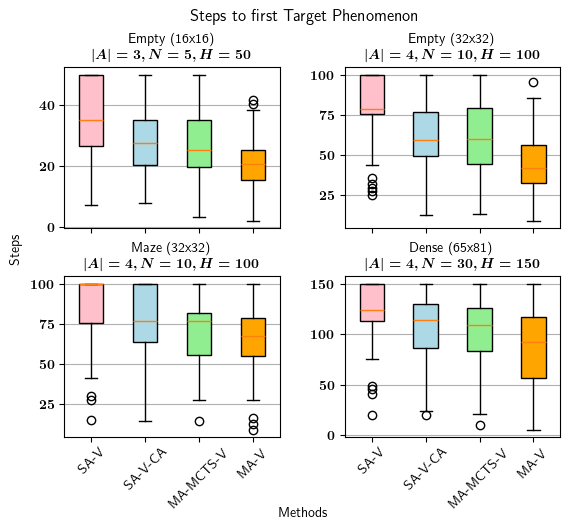

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

plot_box_plots([empty_32_data["single_agent_first_gp_steps"], empty_32_data["single_agent_ca_first_gp_steps"], empty_32_data["multi_agent_mcts_first_gp_steps"], empty_32_data["multi_agent_first_gp_steps"]], axes[0, 1], "empty_32")
plot_box_plots([empty_16_data["single_agent_first_gp_steps"], empty_16_data["single_agent_ca_first_gp_steps"], empty_16_data["multi_agent_mcts_first_gp_steps"], empty_16_data["multi_agent_first_gp_steps"]], axes[0, 0], "empty_16")
plot_box_plots([maze_32_data["single_agent_first_gp_steps"], maze_32_data["single_agent_ca_first_gp_steps"], maze_32_data["multi_agent_mcts_first_gp_steps"], maze_32_data["multi_agent_first_gp_steps"]], axes[1, 0], "maze_32")
plot_box_plots([dense_data["single_agent_first_gp_steps"], dense_data["single_agent_ca_first_gp_steps"], dense_data["multi_agent_mcts_first_gp_steps"], dense_data["multi_agent_first_gp_steps"]], axes[1, 1], "dense")
for ax in axes[1, :]:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Steps to first Target Phenomenon", y=1.0, fontsize=12)
fig.text(0.5, -0.05, 'Methods', ha='center', va='center')
fig.text(0.04, 0.5, 'Steps', va='center', rotation='vertical')
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig(figures_base_path + "first_gp_steps_mapf.svg", bbox_inches='tight')

### First GP step - Realistic Bathymetry Datasets

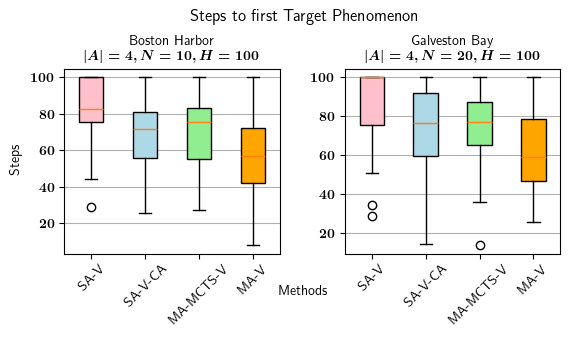

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_size_inches(6.4, 4.8 / 2)

plot_box_plots([boston_harbor_data["single_agent_first_gp_steps"], boston_harbor_data["single_agent_ca_first_gp_steps"], boston_harbor_data["multi_agent_mcts_first_gp_steps"], boston_harbor_data["multi_agent_first_gp_steps"]], axes[0], "boston_harbor")
plot_box_plots([galveston_bay_data["single_agent_first_gp_steps"], galveston_bay_data["single_agent_ca_first_gp_steps"], galveston_bay_data["multi_agent_mcts_first_gp_steps"], galveston_bay_data["multi_agent_first_gp_steps"]], axes[1], "galveston_bay")
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Steps to first Target Phenomenon", y=1.125, fontsize=12)
fig.text(0.5, -0.05, 'Methods', ha='center', va='center')
fig.text(0.04, 0.5, 'Steps', va='center', rotation='vertical')
fig.subplots_adjust(wspace=0.3)
plt.savefig(figures_base_path + "first_gp_steps_realistic.svg", bbox_inches='tight')

### Number of GPs discovered - MAPF Benchmarks

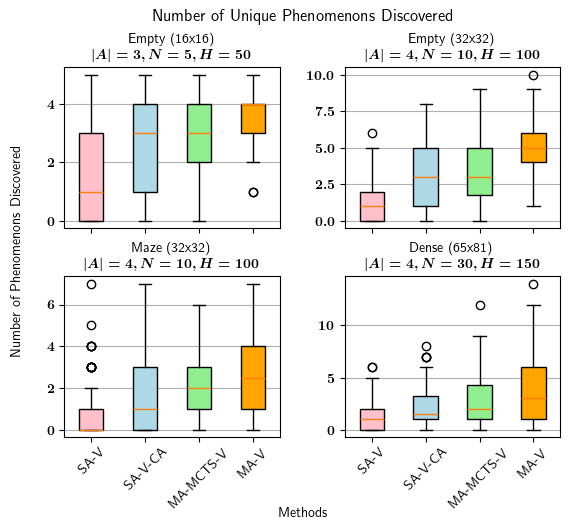

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)
plot_box_plots([empty_16_data["single_agent_phenomenons_discovered"], empty_16_data["single_agent_ca_phenomenons_discovered"], empty_16_data["multi_agent_mcts_phenomenons_discovered"], empty_16_data["multi_agent_phenomenons_discovered"]], axes[0, 0], "empty_16")
plot_box_plots([empty_32_data["single_agent_phenomenons_discovered"], empty_32_data["single_agent_ca_phenomenons_discovered"], empty_32_data["multi_agent_mcts_phenomenons_discovered"], empty_32_data["multi_agent_phenomenons_discovered"]], axes[0, 1], "empty_32")
plot_box_plots([maze_32_data["single_agent_phenomenons_discovered"], maze_32_data["single_agent_ca_phenomenons_discovered"], maze_32_data["multi_agent_mcts_phenomenons_discovered"], maze_32_data["multi_agent_phenomenons_discovered"]], axes[1, 0], "maze_32")
plot_box_plots([dense_data["single_agent_phenomenons_discovered"], dense_data["single_agent_ca_phenomenons_discovered"], dense_data["multi_agent_mcts_phenomenons_discovered"], dense_data["multi_agent_phenomenons_discovered"]], axes[1, 1], "dense")
for ax in axes[1, :]:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Number of Unique Phenomenons Discovered", y=1.0, fontsize=12)
fig.text(0.5, -0.05, 'Methods', ha='center', va='center')
fig.text(0.04, 0.5, 'Number of Phenomenons Discovered', va='center', rotation='vertical')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig(figures_base_path + "phenomenons_discovered_mapf.svg", bbox_inches='tight')

### Number of GPs discovered - Realistic Bathymetry Datasets

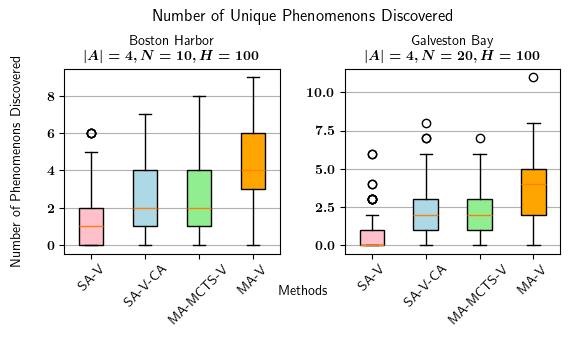

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_size_inches(6.4, 4.8 / 2)

plot_box_plots([boston_harbor_data["single_agent_phenomenons_discovered"], boston_harbor_data["single_agent_ca_phenomenons_discovered"], boston_harbor_data["multi_agent_mcts_phenomenons_discovered"], boston_harbor_data["multi_agent_phenomenons_discovered"]], axes[0], "boston_harbor")
plot_box_plots([galveston_bay_data["single_agent_phenomenons_discovered"], galveston_bay_data["single_agent_ca_phenomenons_discovered"], galveston_bay_data["multi_agent_mcts_phenomenons_discovered"], galveston_bay_data["multi_agent_phenomenons_discovered"]], axes[1], "galveston_bay")
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Number of Unique Phenomenons Discovered", y=1.125, fontsize=12)
fig.text(0.5, -0.05, 'Methods', ha='center', va='center')
fig.text(0.04, 0.5, 'Number of Phenomenons Discovered', va='center', rotation='vertical')
fig.subplots_adjust(wspace=0.3)
plt.savefig(figures_base_path + "phenomenons_discovered_realistic.svg", bbox_inches='tight')

### Larger Galveston Bay Results

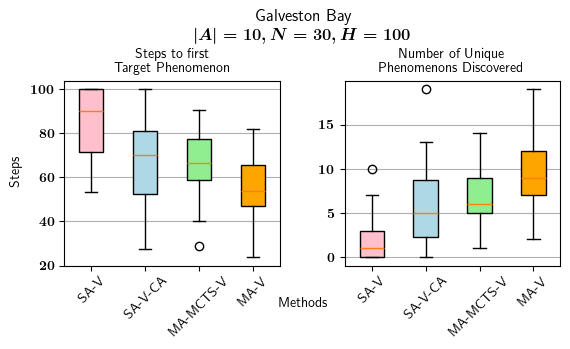

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_size_inches(6.4, 4.8 / 2)
plot_box_plots([larger_galveston_bay_data["single_agent_first_gp_steps"], larger_galveston_bay_data["single_agent_ca_first_gp_steps"], larger_galveston_bay_data["multi_agent_mcts_first_gp_steps"], larger_galveston_bay_data["multi_agent_first_gp_steps"]], axes[0], "larger_galveston_bay_steps")
plot_box_plots([larger_galveston_bay_data["single_agent_phenomenons_discovered"], larger_galveston_bay_data["single_agent_ca_phenomenons_discovered"], larger_galveston_bay_data["multi_agent_mcts_phenomenons_discovered"], larger_galveston_bay_data["multi_agent_phenomenons_discovered"]], axes[1], "larger_galveston_bay_phenomenons")
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Galveston Bay \n" + r"$|A| = 10, N = 30, H = 100$", y=1.175, fontsize=12)
fig.text(0.5, -0.05, 'Methods', ha='center', va='center')
fig.text(0.04, 0.5, 'Steps', va='center', rotation='vertical')
fig.subplots_adjust(wspace=0.3)
plt.savefig(figures_base_path + "larger_galveston_bay.svg", bbox_inches='tight')

### Best Percentage Improvement Analysis

In [10]:
empty_16_phenomenons_discovered = [empty_16_data["single_agent_phenomenons_discovered"], empty_16_data["single_agent_ca_phenomenons_discovered"], empty_16_data["multi_agent_mcts_phenomenons_discovered"], empty_16_data["multi_agent_phenomenons_discovered"]]
empty_32_phenomenons_discovered = [empty_32_data["single_agent_phenomenons_discovered"], empty_32_data["single_agent_ca_phenomenons_discovered"], empty_32_data["multi_agent_mcts_phenomenons_discovered"], empty_32_data["multi_agent_phenomenons_discovered"]]
maze_32_phenomenons_discovered = [maze_32_data["single_agent_phenomenons_discovered"], maze_32_data["single_agent_ca_phenomenons_discovered"], maze_32_data["multi_agent_mcts_phenomenons_discovered"], maze_32_data["multi_agent_phenomenons_discovered"]]
dense_phenomenons_discovered = [dense_data["single_agent_phenomenons_discovered"], dense_data["single_agent_ca_phenomenons_discovered"], dense_data["multi_agent_mcts_phenomenons_discovered"], dense_data["multi_agent_phenomenons_discovered"]]
boston_harbor_phenomenons_discovered = [boston_harbor_data["single_agent_phenomenons_discovered"], boston_harbor_data["single_agent_ca_phenomenons_discovered"], boston_harbor_data["multi_agent_mcts_phenomenons_discovered"], boston_harbor_data["multi_agent_phenomenons_discovered"]]
galveston_bay_phenomenons_discovered = [galveston_bay_data["single_agent_phenomenons_discovered"], galveston_bay_data["single_agent_ca_phenomenons_discovered"], galveston_bay_data["multi_agent_mcts_phenomenons_discovered"], galveston_bay_data["multi_agent_phenomenons_discovered"]]
larger_galveston_bay_phenomenons_discovered = [larger_galveston_bay_data["single_agent_phenomenons_discovered"], larger_galveston_bay_data["single_agent_ca_phenomenons_discovered"], larger_galveston_bay_data["multi_agent_mcts_phenomenons_discovered"], larger_galveston_bay_data["multi_agent_phenomenons_discovered"]]

empty_16_gps_steps = [empty_16_data["single_agent_first_gp_steps"], empty_16_data["single_agent_ca_first_gp_steps"], empty_16_data["multi_agent_mcts_first_gp_steps"], empty_16_data["multi_agent_first_gp_steps"]]
empty_32_gps_steps = [empty_32_data["single_agent_first_gp_steps"], empty_32_data["single_agent_ca_first_gp_steps"], empty_32_data["multi_agent_mcts_first_gp_steps"], empty_32_data["multi_agent_first_gp_steps"]]
maze_32_gps_steps = [maze_32_data["single_agent_first_gp_steps"], maze_32_data["single_agent_ca_first_gp_steps"], maze_32_data["multi_agent_mcts_first_gp_steps"], maze_32_data["multi_agent_first_gp_steps"]]
dense_gps_steps = [dense_data["single_agent_first_gp_steps"], dense_data["single_agent_ca_first_gp_steps"], dense_data["multi_agent_mcts_first_gp_steps"], dense_data["multi_agent_first_gp_steps"]]
boston_harbor_gps_steps = [boston_harbor_data["single_agent_first_gp_steps"], boston_harbor_data["single_agent_ca_first_gp_steps"], boston_harbor_data["multi_agent_mcts_first_gp_steps"], boston_harbor_data["multi_agent_first_gp_steps"]]
galveston_bay_gps_steps = [galveston_bay_data["single_agent_first_gp_steps"], galveston_bay_data["single_agent_ca_first_gp_steps"], galveston_bay_data["multi_agent_mcts_first_gp_steps"], galveston_bay_data["multi_agent_first_gp_steps"]]
larger_galveston_bay_gps_steps = [larger_galveston_bay_data["single_agent_first_gp_steps"], larger_galveston_bay_data["single_agent_ca_first_gp_steps"], larger_galveston_bay_data["multi_agent_mcts_first_gp_steps"], larger_galveston_bay_data["multi_agent_first_gp_steps"]]

empty_16_baseline_median_gps = np.max([np.median(empty_16_phenomenons_discovered[0]), np.median(empty_16_phenomenons_discovered[1]), np.median(empty_16_phenomenons_discovered[2])])
empty_32_baseline_median_gps = np.max([np.median(empty_32_phenomenons_discovered[0]), np.median(empty_32_phenomenons_discovered[1]), np.median(empty_32_phenomenons_discovered[2])])
maze_32_baseline_median_gps = np.max([np.median(maze_32_phenomenons_discovered[0]), np.median(maze_32_phenomenons_discovered[1]), np.median(maze_32_phenomenons_discovered[2])])
dense_baseline_median_gps = np.max([np.median(dense_phenomenons_discovered[0]), np.median(dense_phenomenons_discovered[1]), np.median(dense_phenomenons_discovered[2])])
boston_harbor_baseline_median_gps = np.max([np.median(boston_harbor_phenomenons_discovered[0]), np.median(boston_harbor_phenomenons_discovered[1]), np.median(boston_harbor_phenomenons_discovered[2])])
galveston_bay_baseline_median_gps = np.max([np.median(galveston_bay_phenomenons_discovered[0]), np.median(galveston_bay_phenomenons_discovered[1]), np.median(galveston_bay_phenomenons_discovered[2])])
larger_galveston_bay_baseline_median_gps = np.max([np.median(larger_galveston_bay_phenomenons_discovered[0]), np.median(larger_galveston_bay_phenomenons_discovered[1]), np.median(larger_galveston_bay_phenomenons_discovered[2])])

empty_16_baseline_median_steps = np.max([np.median(empty_16_gps_steps[0]), np.median(empty_16_gps_steps[1]), np.median(empty_16_gps_steps[2])])
empty_32_baseline_median_steps = np.max([np.median(empty_32_gps_steps[0]), np.median(empty_32_gps_steps[1]), np.median(empty_32_gps_steps[2])])
maze_32_baseline_median_steps = np.max([np.median(maze_32_gps_steps[0]), np.median(maze_32_gps_steps[1]), np.median(maze_32_gps_steps[2])])
dense_baseline_median_steps = np.max([np.median(dense_gps_steps[0]), np.median(dense_gps_steps[1]), np.median(dense_gps_steps[2])])
boston_harbor_baseline_median_steps = np.max([np.median(boston_harbor_gps_steps[0]), np.median(boston_harbor_gps_steps[1]), np.median(boston_harbor_gps_steps[2])])
galveston_bay_baseline_median_steps = np.max([np.median(galveston_bay_gps_steps[0]), np.median(galveston_bay_gps_steps[1]), np.median(galveston_bay_gps_steps[2])])
larger_galveston_bay_baseline_median_steps = np.max([np.median(larger_galveston_bay_gps_steps[0]), np.median(larger_galveston_bay_gps_steps[1]), np.median(larger_galveston_bay_gps_steps[2])])

empty_16_median_gps = np.median(empty_16_phenomenons_discovered[-1])
empty_32_median_gps = np.median(empty_32_phenomenons_discovered[-1])
maze_32_median_gps = np.median(maze_32_phenomenons_discovered[-1])
dense_median_gps = np.median(dense_phenomenons_discovered[-1])
boston_harbor_median_gps = np.median(boston_harbor_phenomenons_discovered[-1])
galveston_bay_median_gps = np.median(galveston_bay_phenomenons_discovered[-1])
larger_galveston_bay_phenomenons_discovered = np.median(larger_galveston_bay_phenomenons_discovered[-1])

empty_16_median_steps = np.median(empty_16_gps_steps[-1])
empty_32_median_steps = np.median(empty_32_gps_steps[-1])
maze_32_median_steps = np.median(maze_32_gps_steps[-1])
dense_median_steps = np.median(dense_gps_steps[-1])
boston_harbor_median_steps = np.median(boston_harbor_gps_steps[-1])
galveston_bay_median_steps = np.median(galveston_bay_gps_steps[-1])
larger_galveston_bay_median_steps = np.median(larger_galveston_bay_gps_steps[-1])

empty_16_percentage_imp = (empty_16_median_gps - empty_16_baseline_median_gps) / empty_16_baseline_median_gps * 100
empty_32_percentage_imp = (empty_32_median_gps - empty_32_baseline_median_gps) / empty_32_baseline_median_gps * 100
maze_32_percentage_imp = (maze_32_median_gps - maze_32_baseline_median_gps) / maze_32_baseline_median_gps * 100
dense_percentage_imp = (dense_median_gps - dense_baseline_median_gps) / dense_baseline_median_gps * 100
boston_harbor_percentage_imp = (boston_harbor_median_gps - boston_harbor_baseline_median_gps) / boston_harbor_baseline_median_gps * 100
galveston_bay_percentage_imp = (galveston_bay_median_gps - galveston_bay_baseline_median_gps) / galveston_bay_baseline_median_gps * 100
larger_galveston_bay_percentage_imp = (larger_galveston_bay_phenomenons_discovered - larger_galveston_bay_baseline_median_gps) / larger_galveston_bay_baseline_median_gps * 100

empty_16_percentage_imp_steps = (empty_16_baseline_median_steps - empty_16_median_steps) / empty_16_baseline_median_steps * 100
empty_32_percentage_imp_steps = (empty_32_baseline_median_steps - empty_32_median_steps) / empty_32_baseline_median_steps * 100
maze_32_percentage_imp_steps = (maze_32_baseline_median_steps - maze_32_median_steps) / maze_32_baseline_median_steps * 100
dense_percentage_imp_steps = (dense_baseline_median_steps - dense_median_steps) / dense_baseline_median_steps * 100
boston_harbor_percentage_imp_steps = (boston_harbor_baseline_median_steps - boston_harbor_median_steps) / boston_harbor_baseline_median_steps * 100
galveston_bay_percentage_imp_steps = (galveston_bay_baseline_median_steps - galveston_bay_median_steps) / galveston_bay_baseline_median_steps * 100
larger_galveston_bay_percentage_imp_steps = (larger_galveston_bay_baseline_median_steps - larger_galveston_bay_median_steps) / larger_galveston_bay_baseline_median_steps * 100

print("Empty 16x16: ", empty_16_percentage_imp)
print("Empty 32x32: ", empty_32_percentage_imp)
print("Maze 32x32: ", maze_32_percentage_imp)
print("Dense: ", dense_percentage_imp)
print("Boston Harbor: ", boston_harbor_percentage_imp)
print("Galveston Bay: ", galveston_bay_percentage_imp)
print("Larger Galveston Bay: ", larger_galveston_bay_percentage_imp)

print("Empty 16x16 Steps: ", empty_16_percentage_imp_steps)
print("Empty 32x32 Steps: ", empty_32_percentage_imp_steps)
print("Maze 32x32 Steps: ", maze_32_percentage_imp_steps)
print("Dense Steps: ", dense_percentage_imp_steps)
print("Boston Harbor Steps: ", boston_harbor_percentage_imp_steps)
print("Galveston Bay Steps: ", galveston_bay_percentage_imp_steps)
print("Larger Galveston Bay Steps: ", larger_galveston_bay_percentage_imp_steps)

Empty 16x16:  33.33333333333333
Empty 32x32:  66.66666666666666
Maze 32x32:  25.0
Dense:  50.0
Boston Harbor:  100.0
Galveston Bay:  100.0
Larger Galveston Bay:  50.0
Empty 16x16 Steps:  40.476190476190474
Empty 32x32 Steps:  46.89984101748807
Maze 32x32 Steps:  32.375
Dense Steps:  25.90725806451613
Boston Harbor Steps:  31.212121212121215
Galveston Bay Steps:  41.0
Larger Galveston Bay Steps:  40.29933481152994


### Nodes Analysis

Text(0.5, 0, '\n\nMaps')

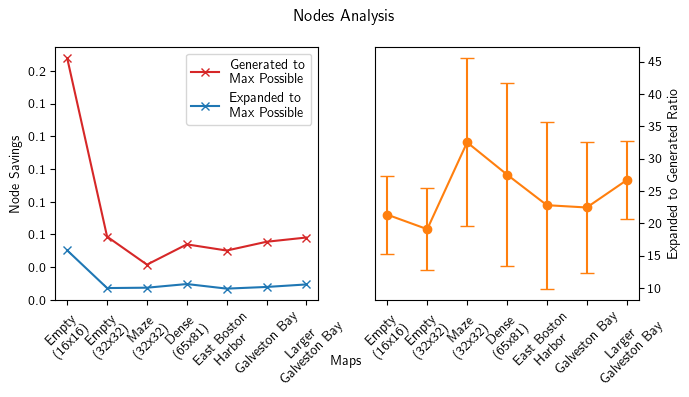

In [11]:
from matplotlib.ticker import FuncFormatter
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(7, 4))

empty_16_gen_to_max = empty_16_data["max_possible_nodes_data"][0] / empty_16_data["max_possible_nodes_data"][-1]
empty_32_gen_to_max = empty_32_data["max_possible_nodes_data"][0] / empty_32_data["max_possible_nodes_data"][-1]
maze_32_gen_to_max = maze_32_data["max_possible_nodes_data"][0] / maze_32_data["max_possible_nodes_data"][-1]
dense_gen_to_max = dense_data["max_possible_nodes_data"][0] / dense_data["max_possible_nodes_data"][-1]
boston_harbor_data_gen_to_max = boston_harbor_data["max_possible_nodes_data"][0] / boston_harbor_data["max_possible_nodes_data"][-1]
galveston_bay_data_gen_to_max = galveston_bay_data["max_possible_nodes_data"][0] / galveston_bay_data["max_possible_nodes_data"][-1]
larger_galveston_bay_data_gen_to_max = larger_galveston_bay_data["max_possible_nodes_data"][0] / larger_galveston_bay_data["max_possible_nodes_data"][-1]

empty_16_exp_to_max = empty_16_data["max_possible_nodes_data"][1] / empty_16_data["max_possible_nodes_data"][-1]
empty_32_exp_to_max = empty_32_data["max_possible_nodes_data"][1] / empty_32_data["max_possible_nodes_data"][-1]
maze_32_exp_to_max = maze_32_data["max_possible_nodes_data"][1] / maze_32_data["max_possible_nodes_data"][-1]
dense_exp_to_max = dense_data["max_possible_nodes_data"][1] / dense_data["max_possible_nodes_data"][-1]
boston_harbor_data_exp_to_max = boston_harbor_data["max_possible_nodes_data"][1] / boston_harbor_data["max_possible_nodes_data"][-1]
galveston_bay_data_exp_to_max = galveston_bay_data["max_possible_nodes_data"][1] / galveston_bay_data["max_possible_nodes_data"][-1]
larger_galveston_bay_data_exp_to_max = larger_galveston_bay_data["max_possible_nodes_data"][1] / larger_galveston_bay_data["max_possible_nodes_data"][-1]

gen_to_max_data = [empty_16_gen_to_max, empty_32_gen_to_max, maze_32_gen_to_max, dense_gen_to_max, boston_harbor_data_gen_to_max, galveston_bay_data_gen_to_max, larger_galveston_bay_data_gen_to_max]
exp_to_max_data = [empty_16_exp_to_max, empty_32_exp_to_max, maze_32_exp_to_max, dense_exp_to_max, boston_harbor_data_exp_to_max, galveston_bay_data_exp_to_max, larger_galveston_bay_data_exp_to_max]
x = np.arange(len(gen_to_max_data))

axes[0].set_ylabel('Node Savings')
axes[0].plot(x, gen_to_max_data, color='tab:red', marker="x", label = "Generated to \n Max Possible")
axes[0].plot(x, exp_to_max_data, color='tab:blue', marker="x", label = "Expanded to \n Max Possible")
axes[0].tick_params(axis='y')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
axes[0].legend()

empty_16_ratio_mean, empty_16_ratio_std = np.mean(empty_16_data["ratios"]), np.std(empty_16_data["ratios"])
empty_32_ratio_mean, empty_32_ratio_std = np.mean(empty_32_data["ratios"]), np.std(empty_32_data["ratios"])
maze_32_ratio_mean, maze_32_ratio_std = np.mean(maze_32_data["ratios"]), np.std(maze_32_data["ratios"])
dense_ratio_mean, dense_ratio_std = np.mean(dense_data["ratios"]), np.std(dense_data["ratios"])
boston_harbor_data_ratio_mean, boston_harbor_data_ratio_std = np.mean(boston_harbor_data["ratios"]), np.std(boston_harbor_data["ratios"])
galveston_bay_data_ratio_mean, galveston_bay_data_ratio_std = np.mean(galveston_bay_data["ratios"]), np.std(galveston_bay_data["ratios"])
larger_galveston_bay_data_ratio_mean, larger_galveston_bay_data_ratio_std = np.mean(larger_galveston_bay_data["ratios"]), np.std(larger_galveston_bay_data["ratios"])

ratio_mean, ratio_std = [empty_16_ratio_mean, empty_32_ratio_mean, maze_32_ratio_mean, dense_ratio_mean, boston_harbor_data_ratio_mean, galveston_bay_data_ratio_mean, larger_galveston_bay_data_ratio_mean], [empty_16_ratio_std, empty_32_ratio_std, maze_32_ratio_std, dense_ratio_std, boston_harbor_data_ratio_std, galveston_bay_data_ratio_std, larger_galveston_bay_data_ratio_std]

axes[1].set_ylabel('Expanded to Generated Ratio')
axes[1].errorbar(x, ratio_mean, ratio_std, fmt='o-', capsize=5, color='tab:orange')
axes[1].tick_params(axis='y')
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

xticklabels = ['Empty \n (16x16)', 'Empty \n (32x32)', 'Maze \n (32x32)', 'Dense \n (65x81)', 'East Boston \n Harbor', 'Galveston Bay', 'Larger \n Galveston Bay']

plt.setp(axes[0], xticks=[y for y in range(len(gen_to_max_data))],
        xticklabels=xticklabels)

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Nodes Analysis")
fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("\n\nMaps")

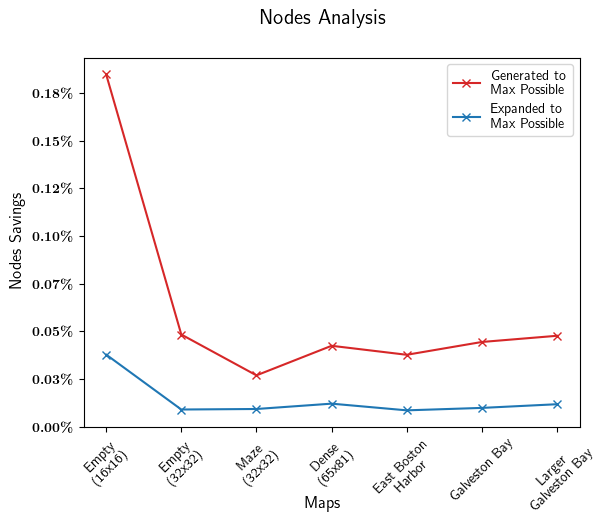

In [12]:
from matplotlib.ticker import FuncFormatter
matplotlib.rc('text', usetex=True)
fig, axes = plt.subplots()

empty_16_gen_to_max = empty_16_data["max_possible_nodes_data"][0] / empty_16_data["max_possible_nodes_data"][-1]
empty_32_gen_to_max = empty_32_data["max_possible_nodes_data"][0] / empty_32_data["max_possible_nodes_data"][-1]
maze_32_gen_to_max = maze_32_data["max_possible_nodes_data"][0] / maze_32_data["max_possible_nodes_data"][-1]
dense_gen_to_max = dense_data["max_possible_nodes_data"][0] / dense_data["max_possible_nodes_data"][-1]
boston_harbor_data_gen_to_max = boston_harbor_data["max_possible_nodes_data"][0] / boston_harbor_data["max_possible_nodes_data"][-1]
galveston_bay_data_gen_to_max = galveston_bay_data["max_possible_nodes_data"][0] / galveston_bay_data["max_possible_nodes_data"][-1]
larger_galveston_bay_data_gen_to_max = larger_galveston_bay_data["max_possible_nodes_data"][0] / larger_galveston_bay_data["max_possible_nodes_data"][-1]

empty_16_exp_to_max = empty_16_data["max_possible_nodes_data"][1] / empty_16_data["max_possible_nodes_data"][-1]
empty_32_exp_to_max = empty_32_data["max_possible_nodes_data"][1] / empty_32_data["max_possible_nodes_data"][-1]
maze_32_exp_to_max = maze_32_data["max_possible_nodes_data"][1] / maze_32_data["max_possible_nodes_data"][-1]
dense_exp_to_max = dense_data["max_possible_nodes_data"][1] / dense_data["max_possible_nodes_data"][-1]
boston_harbor_data_exp_to_max = boston_harbor_data["max_possible_nodes_data"][1] / boston_harbor_data["max_possible_nodes_data"][-1]
galveston_bay_data_exp_to_max = galveston_bay_data["max_possible_nodes_data"][1] / galveston_bay_data["max_possible_nodes_data"][-1]
larger_galveston_bay_data_exp_to_max = larger_galveston_bay_data["max_possible_nodes_data"][1] / larger_galveston_bay_data["max_possible_nodes_data"][-1]

gen_to_max_data = [empty_16_gen_to_max, empty_32_gen_to_max, maze_32_gen_to_max, dense_gen_to_max, boston_harbor_data_gen_to_max, galveston_bay_data_gen_to_max, larger_galveston_bay_data_gen_to_max]
exp_to_max_data = [empty_16_exp_to_max, empty_32_exp_to_max, maze_32_exp_to_max, dense_exp_to_max, boston_harbor_data_exp_to_max, galveston_bay_data_exp_to_max, larger_galveston_bay_data_exp_to_max]

x = np.arange(len(gen_to_max_data))

axes.plot(x, gen_to_max_data, color='tab:red', marker="x", label = "Generated to \n Max Possible")
axes.plot(x, exp_to_max_data, color='tab:blue', marker="x", label = "Expanded to \n Max Possible")
axes.tick_params(axis='y')
axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: r'$%.2f\%%$' % (x * 100)))
axes.legend()

xticklabels = ['Empty \n (16x16)', 'Empty \n (32x32)', 'Maze \n (32x32)', 'Dense \n (65x81)', 'East Boston \n Harbor', 'Galveston Bay', 'Larger \n Galveston Bay']

plt.setp(axes, xticks=[y for y in range(len(gen_to_max_data))],
        xticklabels=xticklabels)

for label in axes.get_xticklabels():
        label.set_rotation(45)

fig.suptitle("Nodes Analysis", fontsize=15)
fig.text(0.5, -0.05, 'Maps', ha='center', va='center', fontsize=12)
fig.text(0.01, 0.5, 'Nodes Savings', va='center', rotation='vertical', fontsize=12)
fig.subplots_adjust(wspace=0.3)

plt.savefig(figures_base_path + "nodes_analysis.svg", bbox_inches='tight')